# Chapitre 1 : Explorer les données 


## Quelques imports et formatages de données

In [1]:
%matplotlib inline
from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels import robust
from scipy.stats import trim_mean
import wquantiles

In [2]:
try:
    import common
    DATA = common.dataDirectory()
except ImportError:
    DATA = Path().resolve() / 'data'

In [3]:
AIRLINE_STATS_CSV = DATA / 'airline_stats.csv'
KC_TAX_CSV = DATA / 'kc_tax.csv.gz'
LC_LOANS_CSV = DATA / 'lc_loans.csv'
AIRPORT_DELAYS_CSV = DATA / 'dfw_airline.csv'
SP500_DATA_CSV = DATA / 'sp500_data.csv.gz'
SP500_SECTORS_CSV = DATA / 'sp500_sectors.csv'
STATE_CSV = DATA / 'state.csv'

## Introduction aux stastistiques

La formule de la moyenne arithmétique d'un ensemble de valeurs est la somme de toutes les valeurs divisée par le nombre de valeurs. En notation mathématique, si nous avons \( n \) valeurs notées \( x_1, x_2,... x_n \), la formule de la moyenne est :

$$
\bar{x} = \frac{1}{n} \sum_{i=1}^{n} x_i
$$


La formule de la moyenne tronquée est calculée en enlevant un certain pourcentage de valeurs extrêmes de chaque côté de l'ensemble de données. Si \( p \% \) des valeurs sont tronquées dans chaque extrémité, la formule est :

$$ \text{Trimmed Mean} = \frac{1}{n - 2m} \sum_{i=m+1}^{n-m} x_i $$

Où :
- \( n \) est le nombre total de valeurs,
- \( m \) est le nombre de valeurs tronquées dans chaque extrémité, donc \( 2m \) valeurs au total retirées,
- \( x_i \) sont les valeurs restantes après troncature.


La formule de la moyenne pondérée est calculée en tenant compte des poids associés à chaque valeur. Si nous avons \( n \) valeurs \( x_1, x_2, \ldots, x_n \) avec des poids correspondants \( w_1, w_2, \ldots, w_n \), la formule de la moyenne pondérée est :

$$
\bar{x} = \frac{\sum_{i=1}^{n} w_i \cdot x_i}{\sum_{i=1}^{n} w_i}
$$

Où :
- \( n \) est le nombre total de valeurs,
- \( x_i \) sont les valeurs,
- \( w_i \) sont les poids associés à chaque valeur.


In [4]:
state = pd.read_csv(STATE_CSV)

print(state.head(2))

     State  Population  Murder.Rate Abbreviation
0  Alabama     4779736          5.7           AL
1   Alaska      710231          5.6           AK


In [5]:
print(f" La moyenne est de {state['Population'].mean()}")
print(f" LA moyenne tronquée est de {trim_mean(state['Population'], 0.1)}")
print(f" La medianne est de {state['Population'].median()}")

 La moyenne est de 6162876.3
 LA moyenne tronquée est de 4783697.125
 La medianne est de 4436369.5


In [6]:
weighted_mean = np.average(state['Murder.Rate'], weights=state['Population'])
weighted_median = wquantiles.median(state['Murder.Rate'],weights=state['Population'])

print(f"La moyenne pondéré est de {int(weighted_mean)}")
print(f"La medianne pondéré est de {int(weighted_median)}")

La moyenne pondéré est de 4
La medianne pondéré est de 4


## Métriques liée à la variabilité des données

La déviation absolue moyenne (DAM) est une mesure de dispersion des données qui représente la moyenne des distances de chaque valeur à la moyenne de l'ensemble de données.

En notation mathématique, si $ x_1, x_2, \ldots, x_n $ sont les valeurs de l'ensemble de données et $ \bar{x} $ est la moyenne, la formule de la déviation absolue moyenne est :

$$ \text{DAM} = \frac{1}{n} \sum_{i=1}^{n} |x_i - \bar{x}| $$

Où :
- $ n $ est le nombre total de valeurs,
- $ x_i $ sont les valeurs,
- $ \bar{x} $ est la moyenne.


La variance est une mesure de dispersion qui indique à quel point les valeurs d'un ensemble de données sont dispersées autour de leur moyenne.

En notation mathématique, si $ x_1, x_2, \ldots, x_n $ sont les valeurs de l'ensemble de données et $ \bar{x} $ est la moyenne, la formule de la variance est :

$$ \text{Var}(X) = \frac{1}{n-1} \sum_{i=1}^{n} (x_i - \bar{x})^2 $$

Où :
- $ n $ est le nombre total de valeurs,
- $ x_i $ sont les valeurs,
- $ \bar{x} $ est la moyenne.


L'écart-type est une mesure de dispersion qui représente la racine carrée de la variance. Il indique la dispersion moyenne des valeurs autour de la moyenne.

En notation mathématique, si $ x_1, x_2, \ldots, x_n $ sont les valeurs de l'ensemble de données et $ \bar{x} $ est la moyenne, la formule de l'écart-type est :

$$ \text{Écart-type}(X) = \sqrt{\text{Var}(X)} = \sqrt{\frac{1}{n-1} \sum_{i=1}^{n} (x_i - \bar{x})^2} $$

Où :
- $ n $ est le nombre total de valeurs,
- $ x_i $ sont les valeurs,
- $ \bar{x} $ est la moyenne.

On divise par n-1 car il s'agit du nombre de degrés de liberté (le calcul de la moyenne en enlève un)


In [7]:
std = state['Population'].std()
iqr = state['Population'].quantile(0.75) - state['Population'].quantile(0.25)
mad = robust.scale.mad(state['Population'])

print(f"L'écart-type vaut {std}")
print(f"L'écart inter-quartile vaut {iqr}")
print(f"La déviation absolue de la médianne est de {mad}\n")


L'écart-type vaut 6848235.347401142
L'écart inter-quartile vaut 4847308.0
La déviation absolue de la médianne est de 3849876.1459979336



On remarque que l'écart-type est deux fois supérieur à la la déviation absolue de la médiane, cela s'explique par la sensibilité de la moyenne aux valeurs extremes

## Exploration des données

### Table de fréquence

In [8]:
rep = state['Murder.Rate'].quantile([0.05, 0.25, 0.5, 0.75, 0.95])
print(f"{rep} murders out of 100.000 people")

0.05    1.600
0.25    2.425
0.50    4.000
0.75    5.550
0.95    6.510
Name: Murder.Rate, dtype: float64 murders out of 100.000 people


### Plot box

Le bas et le haut de la boite représentent respectivement le 25ème et le 75ème percentiles.

La médiane est représenté par la barre horizontale en gras.

Les prolongements en dehors de la boite sont les whiskers qui représentent la dispersion des données.

Les cercles sont les outliers.

Text(0, 0.5, 'Population en million d habitants')

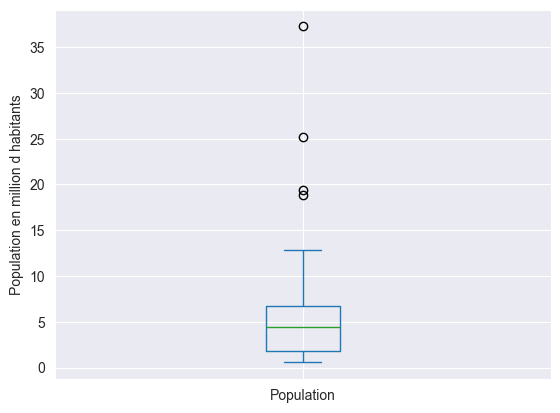

In [9]:
ax = (state['Population']/1_000_000).plot.box()
ax.set_ylabel("Population en million d habitants")

### Table de fréquence

On prend le IQR et on fait des segments de longueur IQR/n

On a donc des segments de même taille mais pas forcément remplies de la même manière, cela est l'opposé des quartiles/deciles/percentiles.

In [10]:
binnedPop = pd.cut(state['Population'], 10)

print(binnedPop.value_counts())

Population
(526935.67, 4232659.0]      24
(4232659.0, 7901692.0]      14
(7901692.0, 11570725.0]      6
(11570725.0, 15239758.0]     2
(15239758.0, 18908791.0]     1
(18908791.0, 22577824.0]     1
(22577824.0, 26246857.0]     1
(33584923.0, 37253956.0]     1
(26246857.0, 29915890.0]     0
(29915890.0, 33584923.0]     0
Name: count, dtype: int64


Text(0, 0.5, 'Fréquence')

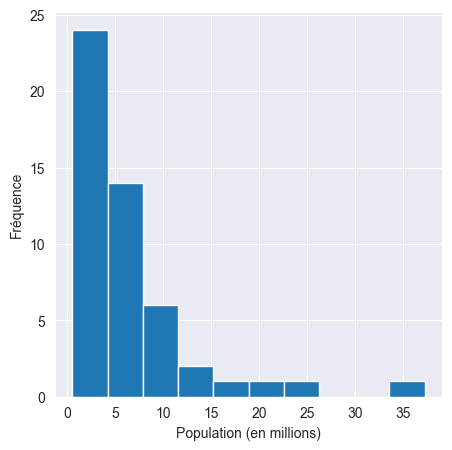

In [11]:
ax = (state['Population'] / 1_000_000).plot.hist(figsize = (5,5))
ax.set_xlabel('Population (en millions)')
ax.set_ylabel('Fréquence')

### Courbe de densité et estimations

Text(0, 0.5, 'Densité')

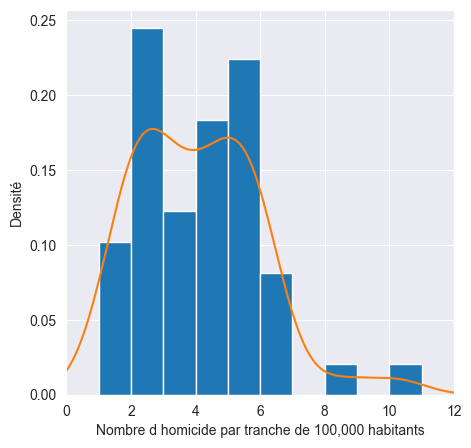

In [12]:
ax = state['Murder.Rate'].plot.hist(density = True, xlim = [0,12],bins = range(1,12), figsize = (5,5))
state['Murder.Rate'].plot.density(ax=ax)
ax.set_xlabel('Nombre d homicide par tranche de 100,000 habitants')
ax.set_ylabel('Densité')

## Exploration de données binaires et catégoriques

### Diagramme en baton

Text(0, 0.5, 'Fréquence')

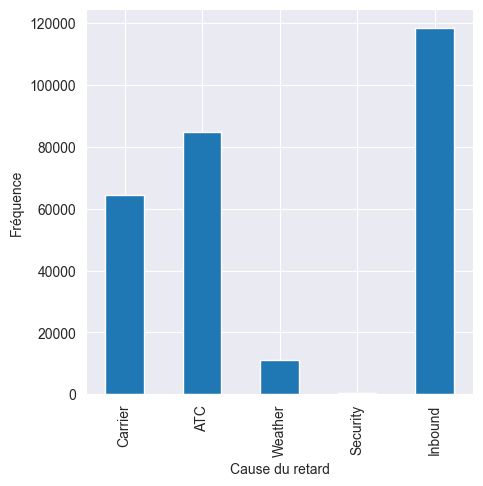

In [13]:
dfw = pd.read_csv(AIRPORT_DELAYS_CSV)

ax = dfw.transpose().plot.bar(figsize = (5,5), legend = False)
ax.set_xlabel('Cause du retard')
ax.set_ylabel('Fréquence')

## Corrélation entre les données

### Coefficient de corrélation

Le coefficient de corrélation est une mesure statistique qui indique l'étendue et la direction de la relation linéaire entre deux variables. Il est souvent noté par la lettre $ r $ et sa valeur varie entre -1 et 1.

- **$ r = 1 $ :** Indique une corrélation positive parfaite, où les deux variables augmentent ensemble de manière linéaire.
- **$ r = -1 $ :** Indique une corrélation négative parfaite, où une variable augmente pendant que l'autre diminue de manière linéaire.
- **$ r = 0 $ :** Indique qu'il n'y a pas de relation linéaire entre les deux variables.

La formule du coefficient de corrélation de Pearson est :

$$
r = \frac{\sum (x_i - \bar{x})(y_i - \bar{y})}{\sqrt{\sum (x_i - \bar{x})^2 \sum (y_i - \bar{y})^2}}
$$

Où :
- $ x_i $ et $ y_i $ sont les valeurs des deux variables,
- $ \bar{x} $ et $ \bar{y} $ sont les moyennes des variables $ x $ et $ y $,
- $ \sum $ représente la somme sur toutes les paires de données.


### Matrice de corrélation

<Axes: >

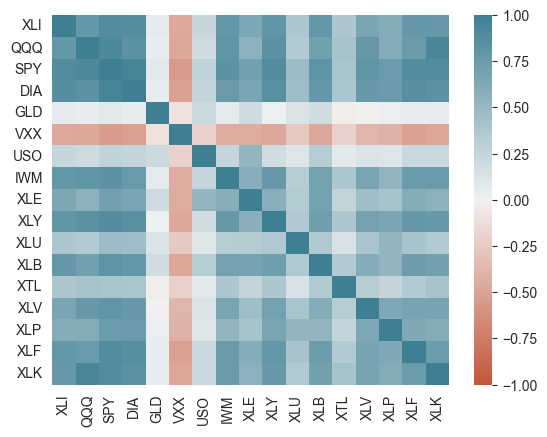

In [14]:
sp500_px = pd.read_csv(SP500_DATA_CSV,index_col=0, parse_dates=True)
sp500_sym = pd.read_csv(SP500_SECTORS_CSV)


etfs = sp500_px.loc[sp500_px.index > '2012-07-01',
                    sp500_sym[sp500_sym['sector'] == 'etf']['symbol']]
sns.heatmap(etfs.corr(), vmin=-1, vmax=1,
            cmap=sns.diverging_palette(20, 220, as_cmap=True))

### Nuage de points

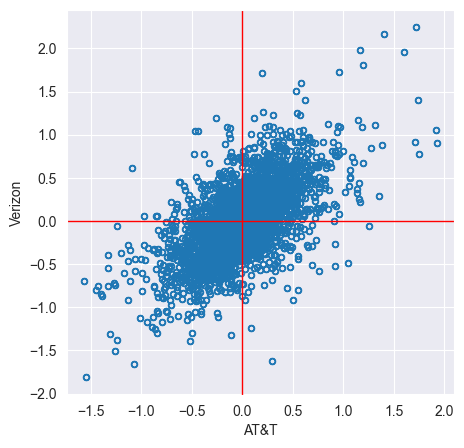

In [15]:
telecom = pd.read_csv(SP500_DATA_CSV)

ax = telecom.plot.scatter(x='T', y='VZ', figsize = (5,5),marker='$\u25EF$')
ax.set_xlabel('AT&T')
ax.set_ylabel('Verizon')

ax.axhline(0, color='red', lw = 1)
ax.axvline(0, color='red', lw = 1)

## Exploration de plusieurs variables

In [16]:
kc = pd.read_csv(KC_TAX_CSV)

kc_tax0 = kc.loc[(kc.TaxAssessedValue < 750000) &
                 (kc.SqFtTotLiving > 100) &
                 (kc.SqFtTotLiving < 3500), :]

print(kc_tax0.shape)

(432693, 3)


### Binages hexagonal

Text(0, 0.5, ' Impôt sur l habitation')

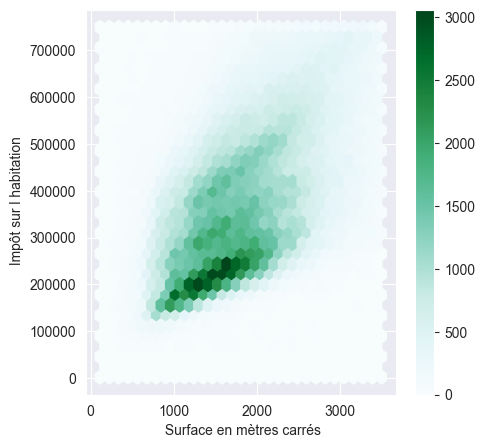

In [17]:
ax = kc_tax0.plot.hexbin(x = 'SqFtTotLiving', y = 'TaxAssessedValue',
                         gridsize=30, sharex = False, figsize =(5,5))


ax.set_xlabel(' Surface en mètres carrés')
ax.set_ylabel(' Impôt sur l habitation')

ax = sns.kdeplot(x = kc_tax0.SqFtTotLiving, y = kc_tax0.TaxAssessedValue, ax=ax)


ax.set_xlabel(' Surface en mètres carrés')
ax.set_ylabel(' Impôts sur l habitation')

### Deux variables catégoriques

In [18]:
lc_loans = pd.read_csv(LC_LOANS_CSV)
crosstab = lc_loans.pivot_table(index='grade', columns='status', aggfunc=lambda x: len(x), margins=True)
df = crosstab.loc['A':'G', :].copy()
df.loc[:, 'Charged Off':'Late'] = df.loc[:, 'Charged Off':'Late'].astype('float64')
df.loc[:, 'Charged Off':'Late'] = df.loc[:, 'Charged Off':'Late'].div(df['All'], axis=0)
df['All'] = df['All'] / df['All'].sum()

perc_crosstab = df

print(perc_crosstab)


status  Charged Off   Current  Fully Paid      Late       All
grade                                                        
A          0.021548  0.690454    0.281528  0.006470  0.160746
B          0.040054  0.709013    0.235401  0.015532  0.293529
C          0.049828  0.735702    0.191495  0.022974  0.268039
D          0.067410  0.717328    0.184189  0.031073  0.164708
E          0.081657  0.707936    0.170929  0.039478  0.077177
F          0.118258  0.654371    0.180409  0.046962  0.028614
G          0.126196  0.614008    0.198396  0.061401  0.007187


/var/folders/fr/nprtm9vx3zs9rx_j2kxtz_b80000gn/T/ipykernel_12716/1911280082.py:5: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0.0215478  0.04005439 0.04982834 0.06740983 0.08165728 0.1182579
 0.12619562]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[:, 'Charged Off':'Late'] = df.loc[:, 'Charged Off':'Late'].div(df['All'], axis=0)
/var/folders/fr/nprtm9vx3zs9rx_j2kxtz_b80000gn/T/ipykernel_12716/1911280082.py:5: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0.69045386 0.70901262 0.73570217 0.71732838 0.70793587 0.65437074
 0.61400802]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[:, 'Charged Off':'Late'] = df.loc[:, 'Charged Off':'Late'].div(df['All'], axis=0)
/var/folders/fr/nprtm9vx3zs9rx_j2kxtz_b80000gn/T/ipykernel_12716/1911280082.py:5: F

### Données catégoriques et numériques

Text(0.5, 0.98, '')

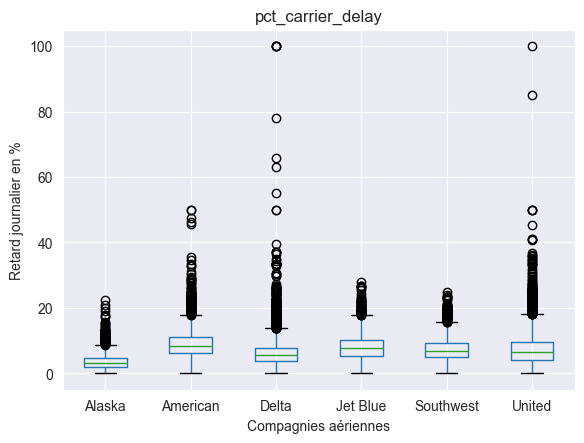

In [19]:
airline_stats = pd.read_csv(AIRLINE_STATS_CSV)


ax = airline_stats.boxplot(by='airline', column='pct_carrier_delay')
ax.set_xlabel('Compagnies aériennes')
ax.set_ylabel('Retard journalier en %')
plt.suptitle('')

### Diagramme en violon

Text(0, 0.5, 'Retard journalier en %')

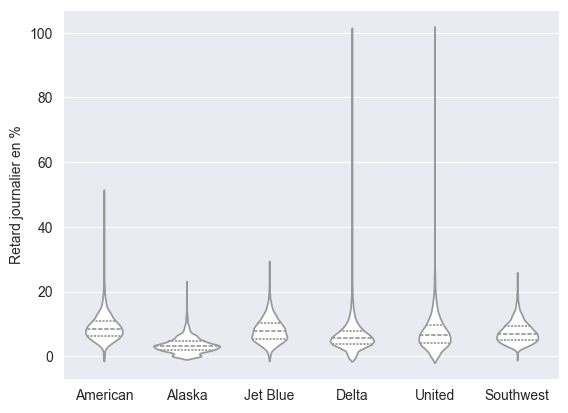

In [20]:
ax = sns.violinplot(x=airline_stats['airline'],
                    y=airline_stats['pct_carrier_delay'],
                    inner='quartile', color='white')
ax.set_xlabel('')
ax.set_ylabel('Retard journalier en %')

### Visualisation de plusieurs variables

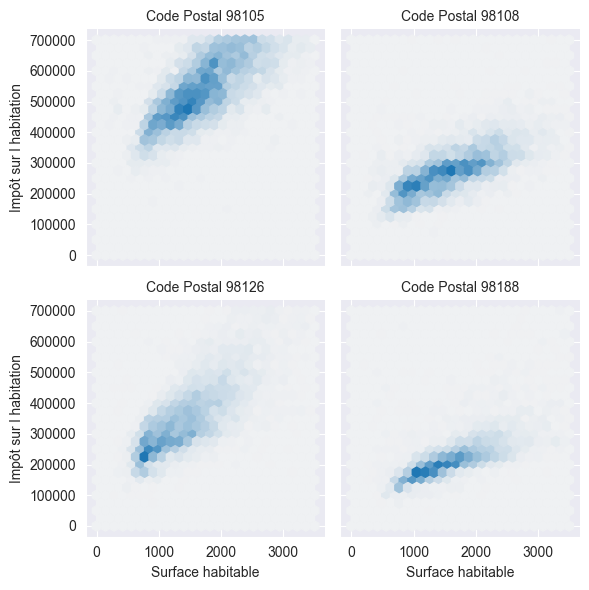

In [25]:
zip_codes = [98188, 98105, 98108, 98126]
kc_tax_zip = kc_tax0.loc[kc_tax0.ZipCode.isin(zip_codes),:]
kc_tax_zip

def hexbin(x, y, color, **kwargs):
    cmap = sns.light_palette(color, as_cmap=True)
    plt.hexbin(x, y, gridsize=25, cmap=cmap, **kwargs)

g = sns.FacetGrid(kc_tax_zip, col='ZipCode', col_wrap=2) 
g.map(hexbin, 'SqFtTotLiving', 'TaxAssessedValue',
      extent=[0, 3500, 0, 700000]) 
g.set_axis_labels('Surface habitable', 'Impôt sur l habitation')
g.set_titles('Code Postal {col_name:.0f}')